In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

In [2]:
import logging
logging.getLogger().setLevel(logging.INFO)
import warnings
warnings.filterwarnings("ignore")

In [3]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt
    
import numpy as np

# Let's import all the necessary functions for the parameter
from neurolib.models.fhn import FHNModel
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.exploration import BoxSearch

# load some utilty functions for explorations
import neurolib.utils.pypetUtils as pu
import neurolib.utils.paths as paths
import neurolib.optimize.exploration.explorationUtils as eu

# The brain network dataset
from neurolib.utils.loadData import Dataset

# Some useful functions are provided here
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

# Set up exploration

In [5]:
ds = Dataset("hcp")
model = FHNModel(Cmat = ds.Cmat, Dmat = ds.Dmat)
model.params.duration = 10 * 1000 #ms
model.params.dt = 0.05
model.params.bold = True

INFO:root:Loading dataset hcp from /Users/caglar/Documents/PhD/projects/neurolib/neurolib/utils/../data/datasets/hcp.
INFO:root:Dataset hcp loaded.
INFO:root:fhn: Model initialized.


In [6]:
model.run(chunkwise=True)

In [7]:
parameters = ParameterSpace({"x_ext": [np.ones((model.params['N'],)) * a for a in  np.linspace(0, 2, 11)]
                             ,"K_gl": np.linspace(0, 2, 11)
                             ,"coupling" : ["additive", "diffusive"]
                            }, kind="grid")
search = BoxSearch(model=model, parameterSpace=parameters, filename='exploration-fhn-coupling.hdf')

INFO:root:Number of processes: 8
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/exploration-fhn-coupling.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Number of parameter configurations: 242
MainProcess root INFO     BoxSearch: Environment initialized.


## Run the expliration

In [8]:
search.run(chunkwise=True, bold=True)

MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-04-08-00H-09M-31S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-04-08-00H-09M-31S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
STARTING runs of trajectory
`results-2020-04-08-00H-09M-31S`.
************************************************************

MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-04-08-00H-09M-31S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `resu

In [24]:
pu.getTrajectorynamesInFile(os.path.join(paths.HDF_DIR, "exploration-fhn-coupling.hdf"))

['results-2020-04-07-19H-59M-13S',
 'results-2020-04-07-20H-13M-58S',
 'results-2020-04-07-20H-15M-58S',
 'results-2020-04-07-20H-19M-32S',
 'results-2020-04-07-20H-20M-21S',
 'results-2020-04-07-20H-20M-38S',
 'results-2020-04-07-20H-21M-29S',
 'results-2020-04-07-20H-23M-02S',
 'results-2020-04-07-20H-31M-37S',
 'results-2020-04-07-20H-34M-17S',
 'results-2020-04-07-20H-49M-50S',
 'results-2020-04-07-20H-51M-32S',
 'results-2020-04-07-20H-52M-01S',
 'results-2020-04-07-20H-53M-45S',
 'results-2020-04-07-20H-56M-45S',
 'results-2020-04-07-20H-58M-20S',
 'results-2020-04-07-21H-07M-39S',
 'results-2020-04-07-23H-34M-41S',
 'results-2020-04-07-23H-42M-12S',
 'results-2020-04-08-00H-01M-49S',
 'results-2020-04-08-00H-07M-03S',
 'results-2020-04-08-00H-08M-18S',
 'results-2020-04-08-00H-09M-31S']

In [25]:
search.trajectoryName

'results-2020-04-08-00H-09M-31S'

# Load results

In [26]:
search.loadResults()

MainProcess root INFO     Loading results from ./data/hdf/exploration-fhn-coupling.hdf
MainProcess root INFO     Analyzing trajectory results-2020-04-08-00H-09M-31S
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/exploration-fhn-coupling.hdf`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading trajectory `results-2020-04-08-00H-09M-31S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `config` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `parameters` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `results` in mode `1`.
MainProcess root INFO     Creating pandas dataframe ...
MainProcess root INFO     Creating results dictionary ...
100%|██████████| 242/242 [00:35<00:00,  6.77it/s]
MainProcess root INFO     All results loaded.


In [27]:
print("Number of results: {}".format(len(search.results)))

Number of results: 242


(0, 2)

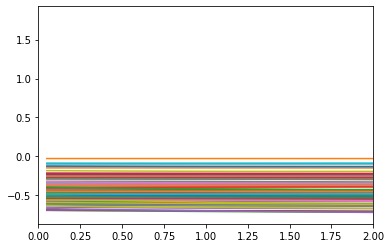

In [28]:
rId = 6
plt.plot(search.results[rId].t, search.results[rId].x.T);
plt.xlim(0, 2)

In [29]:
search.dfResults.iloc[-4:]

,x_ext,K_gl,coupling
238,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...",3.6,additive
239,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...",3.6,diffusive
240,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...",4.0,additive
241,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...",4.0,diffusive


In [30]:
# the external input parameter x_ext is an numpy.array of length N (per node)
# we only take the first entry of each x_ext array
search.dfResults.x_ext = [a[0] for a in list(search.dfResults.x_ext)]

In [31]:
search.dfResults.iloc[-4:]

,x_ext,K_gl,coupling
238,2.0,3.6,additive
239,2.0,3.6,diffusive
240,2.0,4.0,additive
241,2.0,4.0,diffusive


In [32]:
search.dfResults = eu.processExplorationResults(search.results, search.dfResults, model=model, ds=ds, bold_transient=0)

MainProcess root INFO     Bold transient: 0 ms
100%|██████████| 242/242 [00:01<00:00, 135.64it/s]


In [33]:
eu.findCloseResults(search.dfResults, dist=0.2, K_gl=4.0, x_ext = 2.0)

,x_ext,K_gl,coupling,fc,max_x,amp_x
218,1.8,4.0,additive,0.340485,3.285491,2.204204e+00
219,1.8,4.0,diffusive,0.317528,0.808314,3.297362e-14
240,2.0,4.0,additive,0.339092,3.293598,2.174969e+00
241,2.0,4.0,diffusive,0.312954,0.872110,3.086420e-14


# Postprocessing

In [34]:
mean_corr = np.mean([func.matrix_correlation(func.fc(search.results[rId]['BOLD']), fc) for fc in ds.FCs])

print(f"Mean correlation of run {rId} with empirical FC matrices is {mean_corr:.02}")

Mean correlation of run 6 with empirical FC matrices is 0.32


In [35]:
search.getRun(6).params

{'x_ext': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'K_gl': 1.2000000000000002,
 'coupling': 'additive'}

In [36]:
search.dfResults = eu.processExplorationResults(search.results, search.dfResults, model=model, ds=ds, bold_transient=0)

MainProcess root INFO     Bold transient: 0 ms
100%|██████████| 242/242 [00:01<00:00, 143.73it/s]


In [37]:
search.dfResults

,x_ext,K_gl,coupling,fc,max_x,amp_x
0,0.0,0.0,additive,0.236095,-1.820890e-260,2.170764e-234
1,0.0,0.0,diffusive,0.236095,-1.820890e-260,2.170764e-234
2,0.0,0.4,additive,0.064604,6.697106e-200,1.288688e-199
3,0.0,0.4,diffusive,0.249016,2.206569e-158,3.734191e-158
4,0.0,0.8,additive,0.417381,1.551109e+00,2.142259e+00
...,...,...,...,...,...,...
237,2.0,3.2,diffusive,0.264141,8.721103e-01,3.652634e-14
238,2.0,3.6,additive,0.323457,3.120108e+00,2.025981e+00
239,2.0,3.6,diffusive,0.291424,8.721103e-01,3.219647e-14
240,2.0,4.0,additive,0.339092,3.293598e+00,2.174969e+00


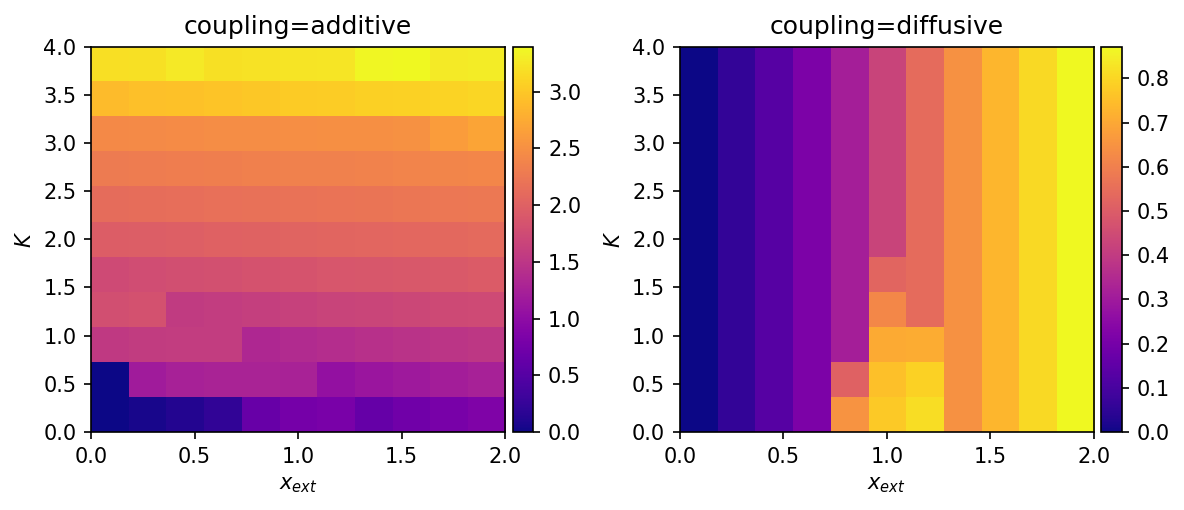

In [23]:
plot_key_label = "Mean FC correlation"
eu.plotExplorationResults(search.dfResults, par1=['x_ext', '$x_{ext}$'], par2=['K_gl', '$K$'], plot_key='max_x',  by=['coupling'], by_label = ['coupling'], plot_key_label=plot_key_label, one_figure=True)